In [1]:
#importing necessary libraries
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#plotting using traditional calculation
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.optimize
from scipy.stats import cauchy
import statistics
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
import math

[[29 29 29 ...  0  0  0]
 [29 29 29 ...  0  0  0]
 [29 29 29 ...  0  0  0]
 ...
 [ 0  0 99 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[29 29 29 ...  0  0  0]
 [29 29 29 ...  0  0  0]
 [29 29 29 ...  0  0  0]
 ...
 [ 0  0 99 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


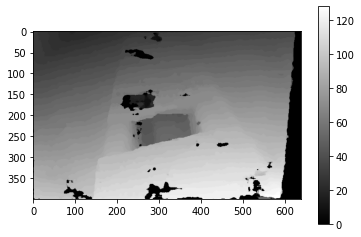

67.96253813966567


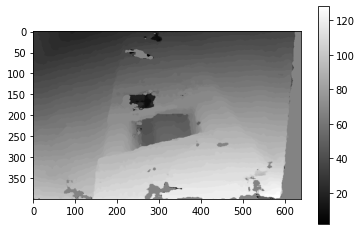

In [18]:
# disparity = np.load('depth_image_0.npy')
disparity = np.load('image_2.npy')
# disparity = cv2.imread('DISPARITYimage14.png')
# disparity = cv2.cvtColor(disparit, cv2.COLOR_BGR2GRAY)
# disparit = cv2.imread('DISPARITYimage20.png')
# disparity = cv2.cvtColor(disparit, cv2.COLOR_BGR2GRAY)
print(disparity)
print(disparity)
disparity3d = np.copy(disparity)
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()
sum_dis = 0
disp_no =0
width1 = disparity.shape[1]
height1 = disparity.shape[0]
for i in range(disparity.shape[0]):
    for j in range(disparity.shape[1]):
        if disparity[i][j] != 0:
            sum_dis= sum_dis + disparity[i][j]
            disp_no = disp_no + 1
avg_dis = sum_dis/disp_no
print(avg_dis)
d1=[]
for i in range(height1):
    for j in range(width1):
        d1.append(disparity[i][j])

for i in range(disparity3d.shape[0]):
    for j in range(disparity3d.shape[1]):
        if(disparity3d[i][j] == 0):
            disparity3d[i][j] = avg_dis
plt.imshow(disparity3d, "gray")
plt.colorbar()
plt.show()

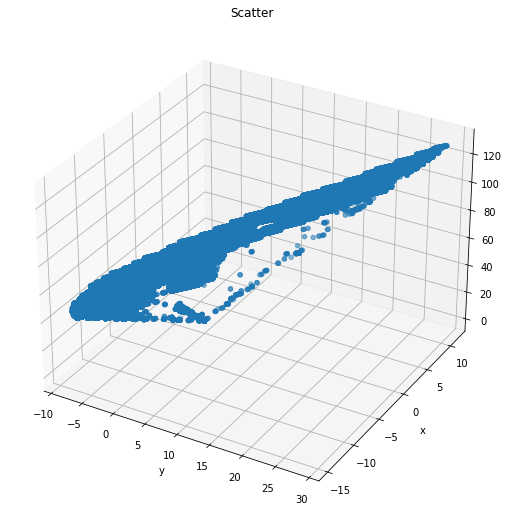

In [48]:
# f = 882
# x3d=[]
# y3d = []
# for i in range(0,height1):
#     for j in range(0,width1):
#         x2 = disparity[i][j]/f *(i - ((width1)/2))
#         x3d.append(x2)
#         y2 = disparity[i][j]/f *(i - ((height1)/2))
#         y3d.append(y2)
# xv1 =np.reshape(x3d,(height1,width1))
# yv1 =np.reshape(y3d,(height1,width1))
# # Creating figure
# fig = plt.figure(figsize =(14, 9))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title('Scatter')
# ax.set_xlabel('y')
# ax.set_ylabel('x')
# ax.set_zlabel('z')
# ax.scatter(y3d,x3d , d)
# plt.show()

In [76]:
# imgray = np.load('image_1.npy')
# # CODE TO CONVERT TO GRAYSCALE


# # gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# # save the image
# # cv2.imwrite('graypothholeresult.jpg', gray1)
# plt.subplot(331),plt.imshow(imgray, cmap='gray'),plt.title('GRAY')
# plt.xticks([]), plt.yticks([])
# #CONTOUR DETECTION CODE
# # imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# ret,thresh = cv2.threshold(imgray,127,255,0)

# contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# #img1 = im.copy()
# img2 = imgray.copy()

# #out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
# out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
# #out = np.hstack([img1, img2])


# img = cv2.imread('index2.jpg',0)
# ret,thresh = cv2.threshold(img,127,255,0)
# contours,hierarchy = cv2.findContours(thresh, 1, 2) 
# # cnt = contours[0]
# # M = cv2.moments(cnt)

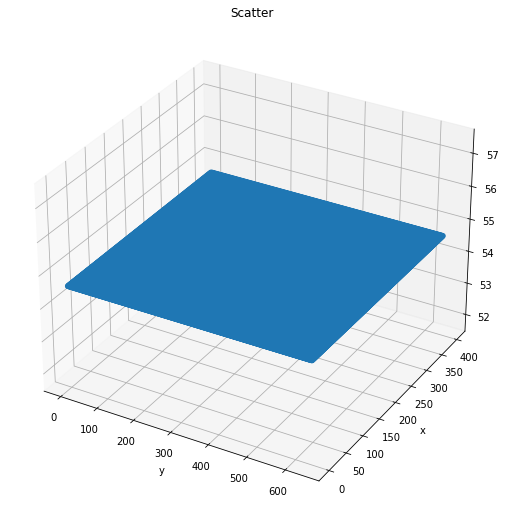

[ 9.93150980e-02  2.71656945e-01  1.69936034e-01 -3.43527469e-04
 -3.08689638e-04 -1.34367421e-04]


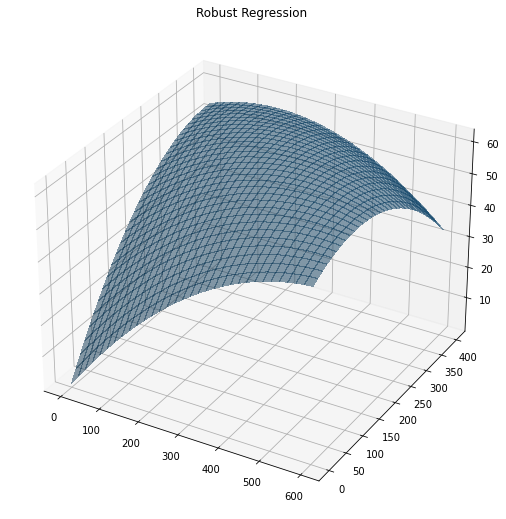

In [14]:
disparity1 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity1[i][j] == disparity3d[i][j]
w=[]
h=[]
d=[]
for i in range(height1):
    for j in range(width1):
        w.append(i)
        h.append(j)
        if(disparity1[i][j]<avg_dis):
            disparity1[i][j]= avg_dis
        d.append(disparity1[i][j])
# print(avg_dis)
fig = plt.figure(figsize =(21, 9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scatter')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')
ax.scatter(h,w , d)
plt.show()

def fun_residual(cf, vars, z):
    x, y = vars
    return (( cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y ) - z)**2

def fun_z(cf, x, y):

    return cf[0] + cf[1]*x + cf[2]*y + cf[3]*x*x + cf[4]*y*x + cf[5]*y*y 


# cf0 = np.ones(6)
cf0 = np.zeros(6)

res_robust = scipy.optimize.least_squares(fun_residual, cf0, loss='cauchy', f_scale=100, args=((np.array(w), np.array(h)), np.array(d)))

x1 = np.linspace(0, 400, 32)

y1 = np.linspace(0, 600, 32)

xv, yv = np.meshgrid(x1, y1)
cfs = res_robust.x
print(cfs)
zv =fun_z(cfs, xv, yv)
z1 =zv.flatten()
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
# ax.scatter(h,w,d)
# ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(yv,xv,zv,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

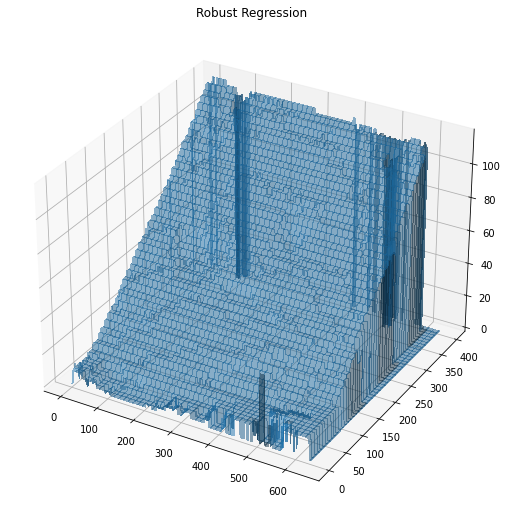

23.38675182518459


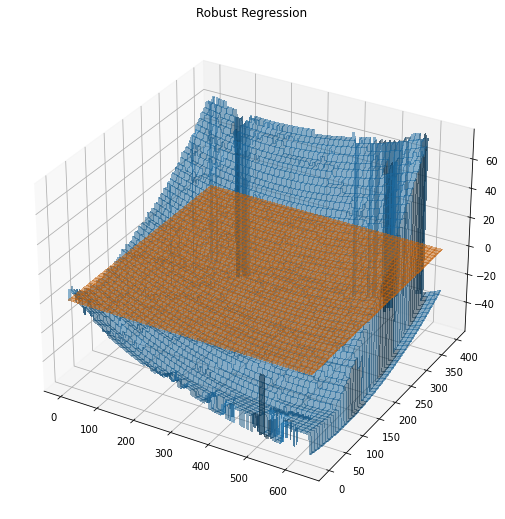

In [15]:
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
w1 =np.reshape(w,(height1,width1))
h1 =np.reshape(h,(height1,width1))
# ax.scatter(xv,yv ,zv)
# ax.plot_surface(xv, yv, fun_z(cfs, xv, yv),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(h1,w1 ,disparity,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

zv =fun_z(cfs, w1, h1)
diff =np.array(disparity) - np.array(zv)
print(diff[300][250])
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_title('Robust Regression')
ax.plot_surface(h1,w1 ,diff,linewidth=0, antialiased=False, shade = True, alpha = 0.5)
ax.plot_surface(h1,w1 ,np.zeros((height1,width1)),linewidth=0, antialiased=False, shade = True, alpha = 0.5)
#zp = fun(cfs , np.array(x3d), np.array(y3d))
# ax.scatter3D(x3d, y3d, z3d)
plt.show()

In [30]:
da = statistics.mode(diff.flatten())
print(data)

13.468411866317929


In [ ]:
for x in range(min(diffli),max(diffli),5): 
    for i in range(0,height1):
        for j in range(0,width1):
            if(diff[i][j]>x and diff[i][j]<x+5):
                c1 = c1 +1
cone.append(c1)

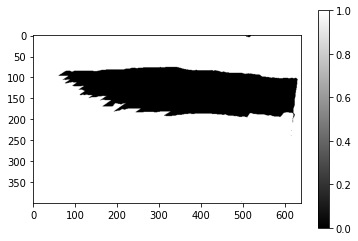

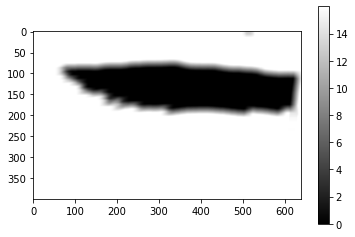

15.999999642372131
12.884109087017714


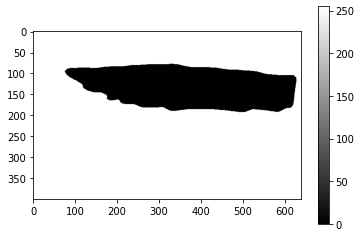

In [16]:
img_black = np.ones((height1,width1))
for i in range(height1):
    for j in range(width1):
        if(diff[i][j] < -10 and disparity[i][j] >= 20):
            img_black[i][j] = 0
plt.imshow(img_black , 'gray')
plt.colorbar()
plt.show()
mask_inv = cv2.bitwise_not(img_black)
kernel = np.ones((20,20),np.float32)/25
dst = cv2.filter2D(img_black,-1,kernel)
blur = cv2.GaussianBlur(img_black,(15,15),0)
plt.imshow(dst, 'gray')
plt.colorbar()
plt.show()

print(dst[0][100])

img_mask = np.ones((height1,width1))
for i in range(1,height1-1):
    for j in range(1,width1-1):
        sum = dst[i-1][j-1] + dst[i-1][j]+ dst[i-1][j+1] + dst[i][j-1] + dst[i][j]+ dst[i][j+1] + dst[i+1][j-1] + dst[i+1][j]+ dst[i+1][j+1]
        img_mask[i][j] = sum/9
# plt.imshow(img_mask , 'gray')
# plt.colorbar()
# plt.show()
        
sumb = 0
no = 0
for i in range(height1):
    for j in range(width1):
        sumb= sumb + dst[i][j]
        no = no +1
avgb = sumb / no
print(avgb)

dio = dst.flatten()
for i in range(height1):
    for j in range(width1):
        if(dst[i][j] > (avgb/2)):
            dst[i][j] = 255
        else:
            dst[i][j] = 0
        
plt.imshow(dst, 'gray')
plt.colorbar()
plt.show()

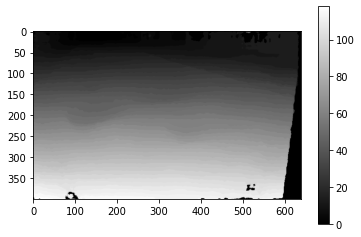

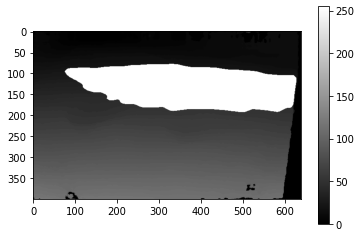

In [17]:
disparity_z = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_z[i][j] = disparity[i][j]
plt.imshow(disparity_z , 'gray')            
plt.colorbar()
plt.show()
for i in range(height1):
    for j in range(width1):
        if(dst[i][j] == 0):
            disparity_z[i][j] = 255
plt.imshow(disparity_z , 'gray')            
plt.colorbar()
plt.show()

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
[51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 

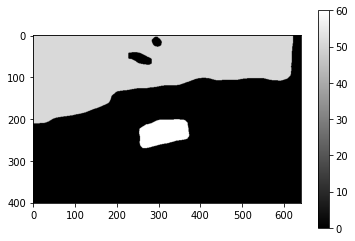

In [8]:
disparity_pl = np.zeros((height1+1,width1+1))
child=[]
mom =[]
a=50
for i in range(1,height1):
    for j in range(1,width1):
        if(disparity_z[i][j] == 255):
            if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]==0 ):
                a = a+1
                print(a)
                disparity_pl[i][j]=a
            else:
                if(disparity_pl[i-1][j]!=0 or disparity_pl[i][j-1]!=0):
                    if(disparity_pl[i-1][j]==0 and disparity_pl[i][j-1]!=0):
                        disparity_pl[i][j]=disparity_pl[i][j-1]
                    elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]==0):
                        disparity_pl[i][j]=disparity_pl[i-1][j]
                    elif(disparity_pl[i-1][j]!=0 and disparity_pl[i][j-1]!=0):
                        c = min(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                        mo =c
                        disparity_pl[i][j] = c
                        chil = max(disparity_pl[i-1][j] , disparity_pl[i][j-1])
                        if mo in child:
                            mom.append(mom[child.index(mo)])
                        else:
                            mom.append(mo)
                        child.append(chil)
#                         print(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]), " is a child of ",c)
#                         if max(disparity_pl[i-1][j] , disparity_pl[i][j-1]) not in child:
#                             child.append(max(disparity_pl[i-1][j] , disparity_pl[i][j-1]))
#                         if c not in mom:
#                             mom.append(c)
print(mom)
print(child)
# for i in mom:
#     if i in child:
#         mom.remove(i)
# print(mom)
cv2.imshow('Contours', disparity_pl)
cv2.waitKey(0)
cv2.destroyAllWindows()
# # plt.imshow(disparity_pl , 'gray')            
# # plt.colorbar()
# # plt.show()
for i in range(1,height1):
    for j in range(1,width1):
        if(disparity_pl[i][j] in child):
            disparity_pl[i][j] = mom[child.index(disparity_pl[i][j])]
cv2.imshow('Contours', disparity_pl)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(disparity_pl , 'gray')            
plt.colorbar()
plt.show()
# # print(disparity_pl)
# # print(child)
# # print(mom)
# count = 0
# for i in range(1,height1):
#     for j in range(1,width1):
#         if(disparity_pl[i][j] != 0 or disparity_pl[i][j] != 1):
#             count= count +1
# print(count)

In [9]:
single = [] 
[single.append(x) for x in mom if x not in single]
print(single)

[51.0, 60.0]


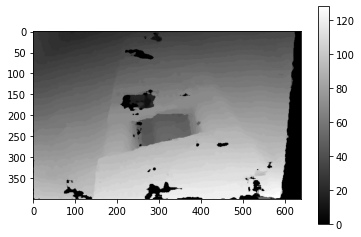

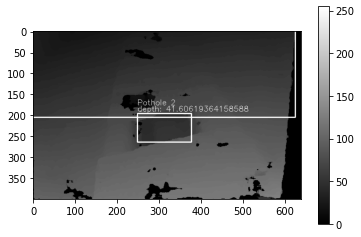

In [10]:
disparity_rect = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_rect[i][j] = disparity[i][j]
plt.imshow(disparity_rect , 'gray')            
plt.colorbar()
plt.show()
top=[]
bottom=[]
left =[]
right =[]
sum_calc = 0
d_no = 0
for x in range(len(single)):
    proxy =[]
    proxy2=[]
    for i in range(0,height1):
        for j in range(0,width1):
            if(disparity_pl[i][j] == single[x]):
                proxy.append(i)
                break
    top.append(proxy[0])
    bottom.append(proxy[len(proxy)-1])
    for j in range(0,width1):
        for i in range(0,height1):
            if(disparity_pl[i][j] == single[x]):
                sum_calc = sum_calc + disparity[i][j]
                d_no = d_no+1
    avg_disp = sum_calc / d_no 
    #Assumption: I encounter the particular label only in one pothole 
    for j in range(0,width1):
        for i in range(0,height1):
            if(disparity_pl[i][j] == single[x]):
                proxy2.append(j)
                break
    left.append(proxy2[0])
    right.append(proxy2[len(proxy2)-1])
#     for i in range(height1-1, -1):
#         for j in range(0,width1):
#             if(disparity_pl[i][j] == single[x]):
#                 bottom.append[j]
#                 break 
a =1
for x in range(len(single)):
    start_point = (left[x]-5 , top[x]-5)
    end_point = (right[x]+5 , bottom[x]-5)
    start_point_txt = (left[x]-5 , top[x]-25)
    start_point_txt1 = (left[x]-5 , top[x]-10)
    # Blue color in BGR
    color = (255, 0, 0)

    # Line thickness of 2 px
    thickness = 2
    txt = 'Pothole '+str(a)
    txt1 = 'depth: '+str(avg_disp)
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
    disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
    a=a+1
plt.imshow(disparity_rect , 'gray')            
plt.colorbar()
plt.show()
# cv2.imshow('Contours', disparity_z)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
single1 = []
remove = []
remove=[]
removel=[]
remover=[]
removet=[]
removeb=[]
[single1.append(x) for x in single]
print(single1)
print(left)
print(right)
print(top)
print(bottom)
avg =[]
avg_pot=[]
for x in range(len(single)):
#     start_point = (left[x]-5 , top[x]-5)
#     end_point = (right[x]+5 , bottom[x]+5)
#     start_point_txt = (left[x]-5 , top[x]-25)
#     start_point_txt1 = (left[x]-5 , top[x]-10)
#     # Blue color in BGR
#     color = (255, 0, 0)

#     # Line thickness of 2 px
#     thickness = 2
#     txt = 'Pothole '+str(a)
#     txt1 = 'depth: '+str(avg_disp)
#     # Using cv2.rectangle() method
#     # Draw a rectangle with blue line borders of thickness of 2 px
#     disparity_rect = cv2.rectangle(disparity_rect, start_point, end_point, color, thickness)
#     disparity_rect = cv2.putText(disparity_rect, txt , start_point_txt,
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
#     disparity_rect = cv2.putText(disparity_rect, txt1 , start_point_txt1,
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
#     a=a+1
    sum_final =0
    dis_final_no =0
    sum_final_pot =0
    dis_final_no_pot =0
    for s in range(top[x]-10, bottom[x]+10):
        for r in range(left[x]-10 , right[x]+10):
            if(s < 0 or s >= disparity.shape[0] or r<0 or r>=disparity.shape[1]):
                if single[x] not in remove:
                    remove.append(single[x])
                    removel.append(left[x])
                    remover.append(right[x])
                    removet.append(top[x])
                    removeb.append(bottom[x])
#                 print(single[x])
            else:
                if(disparity_pl[s][r] ==0 and disparity[s][r] != 0):
                    sum_final = sum_final + disparity[s][r]
                    dis_final_no = dis_final_no + 1
                else:
                    sum_final_pot = sum_final_pot + disparity[s][r]
                    dis_final_no_pot = dis_final_no_pot + 1
    avg_dis_final = sum_final / dis_final_no
    avg.append(avg_dis_final)
    avg_dis_final_pot = sum_final_pot / dis_final_no_pot
    avg_pot.append(avg_dis_final_pot)
print(remove)
print(avg)
print(avg_pot)
diff_pot =[]
for x in range(len(avg)):
    difflia = avg[x]-avg_pot[x]
    diff_pot.append(difflia)
print()
print(diff_pot)
for i in range(len(remove)):
    single1.remove(remove[i])
    left.remove(removel[i])
    right.remove(remover[i])
    top.remove(removet[i])
    bottom.remove(removeb[i])
print(single1)

[51.0, 60.0]
[1, 254]
[621, 373]
[1, 201]
[210, 269]
[51.0]
[63.37516168188964, 71.25339288781996]
[39.137014915261894, 45.766807050382155]

[24.238146766627743, 25.4865858374378]
[60.0]


[254]


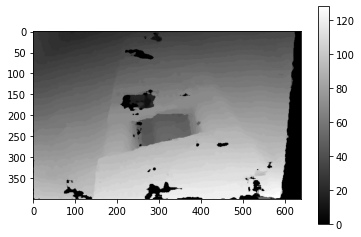

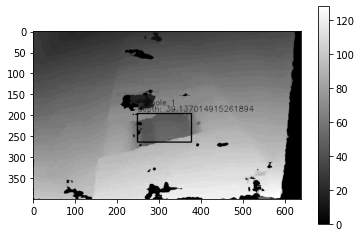

In [12]:
print(left)
disparity_rect_1 = np.zeros((height1,width1))
for i in range(height1):
    for j in range(width1):
        disparity_rect_1[i][j] = disparity[i][j]
plt.imshow(disparity_rect_1 , 'gray')            
plt.colorbar()
plt.show()

a =1
for x in range(len(single1)):
    start_point = (left[x]-5 , top[x]-5)
    end_point = (right[x]+5 , bottom[x]-5)
    start_point_txt = (left[x]-5 , top[x]-25)
    start_point_txt1 = (left[x]-5 , top[x]-10)
    # Blue color in BGR
    color = (0, 0, 0)

    # Line thickness of 2 px
    thickness = 2
    txt = 'Pothole '+str(a)
    txt1 = 'depth: '+str(avg_pot[x])
    # Using cv2.rectangle() method
    # Draw a rectangle with blue line borders of thickness of 2 px
    disparity_rect_1 = cv2.rectangle(disparity_rect_1, start_point, end_point, color, thickness)
    disparity_rect_1 = cv2.putText(disparity_rect_1, txt , start_point_txt,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
    disparity_rect_1 = cv2.putText(disparity_rect_1, txt1 , start_point_txt1,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)
    a=a+1
plt.imshow(disparity_rect_1 , 'gray')            
plt.colorbar()
plt.show()